In [71]:
import numpy as np


def CLR_transform(X):
    minval = np.min(X[np.nonzero(X)])
    X[X == 0] = minval * 0.65
    X = np.log(X)
    X = X - np.mean(X, axis = 0)
    return(X)

def load_csv_data(data_path, n_min = 1000, CLR = True):
    """Loads data and returns y (class labels), tX (features) and ids (event ids)"""
    print('Loading data...')
    y = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str, usecols=1)
    data = np.genfromtxt(data_path, delimiter=",", skip_header=1)
    ids = data[:, 0].astype(np.int)
    X = data[:, 2:]

    # convert class labels from strings to binary (0,1)
    yb = np.ones(len(y))
    yb[np.where(y=='Prokaryote')] = 0
    
    # Remove rows having less than n_min counts
    print('Removing rows with less than n_min counts...')
    to_delete = [i for i in range(X.shape[0]) if np.sum(X[i,]) < n_min]
    yb   = np.delete(yb,   to_delete, axis=0)
    ids = np.delete(ids, to_delete, axis=0)
    X   = np.delete(X,   to_delete, axis=0)
    
    #print('Counts to frequencies...')
    #row_sums = np.sum(X, axis = 0)
    #X = X / X.sum(axis=1, keepdims=True)
    if CLR == True:
        print('Counts to CLR transformed...')
        X = CLR_transform(X)

        print('Data loaded!')
        return yb, X, ids
    
    else:
        print('Counts to frequencies...')
        X = X / X.sum(axis=1, keepdims=True)
        print('Data loaded!')
        return yb, X, ids

In [74]:
y_freq, X_freq, ids = load_csv_data('Counts_n10000_k5_s5000.csv', n_min=2000, CLR=False)
y, X, ids = load_csv_data('Counts_n10000_k5_s5000.csv', n_min=2000)

Loading data...
Removing rows with less than n_min counts...
Counts to frequencies...
Loading data...
Removing rows with less than n_min counts...
Counts to CLR transformed...
Data loaded!


In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=10)
pca.fit(X_freq)
X_pca_freq = pca.transform(X_freq)

plt.scatter(X_pca_freq[:,0],X_pca_freq[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('PCA_frequencies_data.pdf')
plt.close()

var_pca = pca.explained_variance_ratio_
plt.bar(range(0,len(var_pca)), var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.tight_layout()
plt.savefig('PCA_frequencies_eigen.pdf')
plt.close()


#######################################
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('PCA_CLR_data.pdf')
plt.close()

var_pca = pca.explained_variance_ratio_
plt.bar(range(0,len(var_pca)), var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.tight_layout()
plt.savefig('PCA_CLR_eigen.pdf')
plt.close()

<AxesSubplot:>

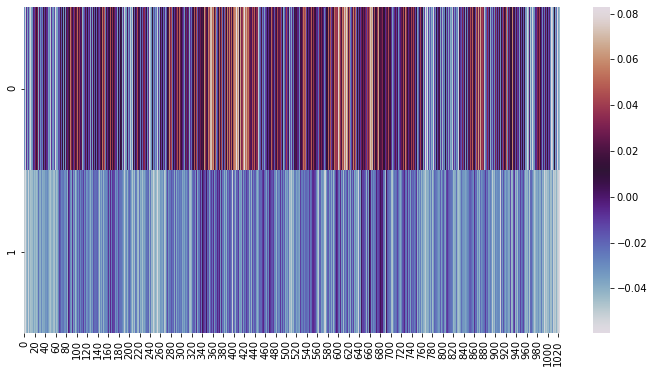

In [60]:
import seaborn as sns
import pandas as pd
%matplotlib inline

map= pd.DataFrame(pca.components_)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')


### Create train and test data:

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [95]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import time

print('Frequency data:')
t0 = time.time()
clf = svm.LinearSVC(max_iter = 10000, C=100)
scores = cross_val_score(clf, X_freq, y_freq, cv=3)
print(scores)
t1 = time.time()
print(t1-t0)

print('CLR data:')
t0 = time.time()
clf = svm.LinearSVC(max_iter = 10000, C=100)
scores = cross_val_score(clf, X, y, cv=3)
print(scores)
t1 = time.time()
print(t1-t0)

Frequency data:
[0.97172775 0.96928447 0.97137871]
109.51309704780579
CLR data:
[0.96282723 0.96474695 0.95671902]
36.06466484069824


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import time

t0 = time.time()
clf = LogisticRegression(random_state=23, max_iter = 10000)
scores = cross_val_score(clf, X_freq, y_freq, cv=3)
print(scores)
t1 = time.time()
print(t1-t0)

t0 = time.time()
clf = LogisticRegression(random_state=23, max_iter = 10000)
scores = cross_val_score(clf, X, y, cv=3)
print(scores)
t1 = time.time()
print(t1-t0)

[0.95514834 0.95253054 0.95811518]
8.752347707748413
[0.96404887 0.96719023 0.95846422]
38.78221797943115


In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import time

t0 = time.time()
clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=23, solver='adam', max_iter=200)
scores = cross_val_score(clf, X, y, cv=3)
print(scores)
t1 = time.time()
print(t1-t0)



[0.98741624 0.98725282 0.9887218 ]
15.632694959640503


In [ ]:
import matplotlib.pyplot as plt

plt.plot(hidden_sizes, mean_accuracy)

No difference in accuracy when at least 200 iterations for 25,50,75,100 hidden nodes. 50 is slightly optimal with 3-fold CV. We will now test adding layers, and see how it improves the accuracy, still with 200 max iter.

In [92]:
import time
n_nodes = [50,100,150,200,250,300,350,400,450,500]
scores = np.empty((0,10))
times = []
time_l = np.array(times)

for n in n_nodes:
    t0 = time.time()
    clf = MLPClassifier(hidden_layer_sizes=(n,), random_state=23,solver='adam', max_iter=1000)
    cv_res = cross_val_score(clf, X, y, cv=10)
    scores = np.vstack((scores, cv_res))
    t1 = time.time()
    timing = t1 - t0
    print(timing)
    time_l = np.append(time_l, timing)



54.09356212615967
75.9221441745758
105.57220315933228
128.5816650390625
152.2153549194336
168.81383323669434
179.69444298744202
199.73330187797546
219.94712018966675
257.4192600250244


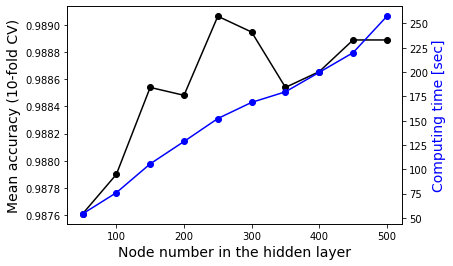

In [94]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(n_nodes, np.mean(scores, axis = 1), color="black", marker="o")
ax.set_xlabel("Node number in the hidden layer",fontsize=14)
ax.set_ylabel("Mean accuracy (10-fold CV)",color="black",fontsize=14)

ax2=ax.twinx()

ax2.plot(n_nodes, time_l,color="blue",marker="o")
ax2.set_ylabel("Computing time [sec]",color="blue",fontsize=14)
plt.show()

fig.savefig('NN_n_nodes.pdf',bbox_inches='tight')